## How To Quickly Compute The Mandelbrot Set In Python 

Source: https://www.ibm.com/developerworks/community/blogs/jfp/entry/How_To_Compute_Mandelbrodt_Set_Quickly?lang=en  


  
other source: https://gist.github.com/jfpuget/60e07a82dece69b011bb
  
I took a few example out of it

$$z_0 = 0$$  
$$z_{1} = c$$  
$$z_2 = z_1^2 + c$$
$$...$$  
$$z_{n+1} = z_n^2 + c$$

### Naive Python

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors
%matplotlib inline

In [2]:
def mandelbrot_image(xmin,xmax,ymin,ymax,width=3,height=3,maxiter=80,cmap='hot'):
    dpi = 72
    img_width = dpi * width
    img_height = dpi * height
    x,y,z = mandelbrot_set(xmin,xmax,ymin,ymax,img_width,img_height,maxiter)
    
    fig, ax = plt.subplots(figsize=(width, height),dpi=72)
    ticks = np.arange(0,img_width,3*dpi)
    x_ticks = xmin + (xmax-xmin)*ticks/img_width
    plt.xticks(ticks, x_ticks)
    y_ticks = ymin + (ymax-ymin)*ticks/img_width
    plt.yticks(ticks, y_ticks)
    
    norm = colors.PowerNorm(0.3)
    ax.imshow(z.T,cmap=cmap,origin='lower',norm=norm)

In [6]:
def mandelbrot (z, maxiter):
    c = z
    for n in range(maxiter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return maxiter

def mandelbrot_set (xmin, xmax, ymin, ymax, width, height, maxiter):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    n3 = np.empty((width,height))
    for i in range(width):
        for j in range(height):
            n3[i,j] = mandelbrot(r1[i] + 1j*r2[j],maxiter)
    return (r1,r2,n3)

In [7]:
%timeit mandelbrot_set(-2.0, 0.5, -1.25, 1.25, 1000, 1000, 80)
#%timeit mandelbrot_set(-0.74877,-0.74872,0.06505,0.06510,1000,1000,2048)

16.3 s ± 345 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


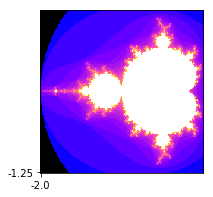

In [8]:
mandelbrot_image(-2.0,0.5,-1.25,1.25,maxiter=80,cmap='gnuplot2')

### Numpy Array Operations

In [14]:
def mandelbrot_numpy(c, maxiter):
    output = np.zeros(c.shape)
    z = np.zeros(c.shape, np.complex64)
    
    for it in range(maxiter):
        notdone = np.less(z.real*z.real + z.imag*z.imag, 4.0)
        output[notdone] = it
        z[notdone] = z[notdone]**2 + c[notdone]
    output[output == maxiter -1] = 0
    return output

def mandelbrot_set2(xmin, xmax, ymin, ymax, width, height, maxiter):
    r1 = np.linspace(xmin, xmax, width, dtype = np.float32)
    r2 = np.linspace(ymin, ymax, height, dtype = np.float32)
    c = r1 + r2[:, None]*1j
    n3 = mandelbrot_numpy(c, maxiter)
    return (r1, r2, n3.T)


In [15]:
%timeit mandelbrot_set2(-2.0, 0.5, -1.25, 1.25, 1000, 1000, 80)
%timeit mandelbrot_set2(-0.74877,-0.74872,0.06505,0.06510,1000,1000,2048)

1.4 s ± 176 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
39.7 s ± 1.48 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


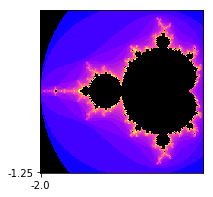

In [16]:
mandelbrot_set = mandelbrot_set2
mandelbrot_image(-2.0,0.5,-1.25,1.25,cmap='gnuplot2')